In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv('Online Sales Data.csv')

In [92]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [93]:
df_new = df.drop(['Transaction ID'], axis=1)
df_new.head()

,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [94]:
print("Data Shape")
print(f'Number of rows: {df_new.shape[0]}')
print(f'Number of columns: {df_new.shape[1]}')

Data Shape
Number of rows: 240
Number of columns: 8


In [95]:
print("Data Types")
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new['Month'] = df_new['Date'].dt.month
df_new['Quarter'] = df_new['Date'].dt.quarter
df_new['Product Category'] = df_new['Product Category'].astype('category')
df_new['Product Name'] = df_new['Product Name'].astype('category')
df_new['Region'] = df_new['Region'].astype('category')
df_new['Payment Method'] = df_new['Payment Method'].astype('category')
print(df_new.dtypes)

Data Types
Date                datetime64[ns]
Product Category          category
Product Name              category
Units Sold                   int64
Unit Price                 float64
Total Revenue              float64
Region                    category
Payment Method            category
Month                        int32
Quarter                      int32
dtype: object


In [96]:
print("Basic Statistics")
print(df_new.describe())

Basic Statistics
                      Date  Units Sold   Unit Price  Total Revenue  \
count                  240  240.000000   240.000000     240.000000   
mean   2024-04-29 12:00:00    2.158333   236.395583     335.699375   
min    2024-01-01 00:00:00    1.000000     6.500000       6.500000   
25%    2024-02-29 18:00:00    1.000000    29.500000      62.965000   
50%    2024-04-29 12:00:00    2.000000    89.990000     179.970000   
75%    2024-06-28 06:00:00    3.000000   249.990000     399.225000   
max    2024-08-27 00:00:00   10.000000  3899.990000    3899.990000   
std                    NaN    1.322454   429.446695     485.804469   

            Month     Quarter  
count  240.000000  240.000000  
mean     4.458333    1.862500  
min      1.000000    1.000000  
25%      2.750000    1.000000  
50%      4.000000    2.000000  
75%      6.000000    2.000000  
max      8.000000    3.000000  
std      2.275560    0.777461  


In [97]:
print("Nulls")
print(df_new.isnull().sum())

Nulls
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
Month               0
Quarter             0
dtype: int64


In [98]:
print("Duplicate")
print(df_new.duplicated().sum())

Duplicate
0


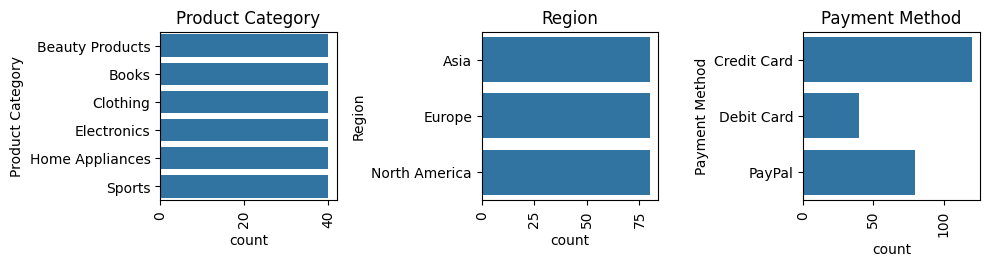

In [99]:
category = df_new.select_dtypes(include=['category']).columns
category = category.drop(['Product Name'])
plt.figure(figsize = (10,7))
for i, col in enumerate(category):
  plt.subplot(3,3,i+1)
  sns.countplot(df_new[col])
  plt.xticks(rotation=90)
  plt.title(col)
plt.tight_layout()
plt.show()

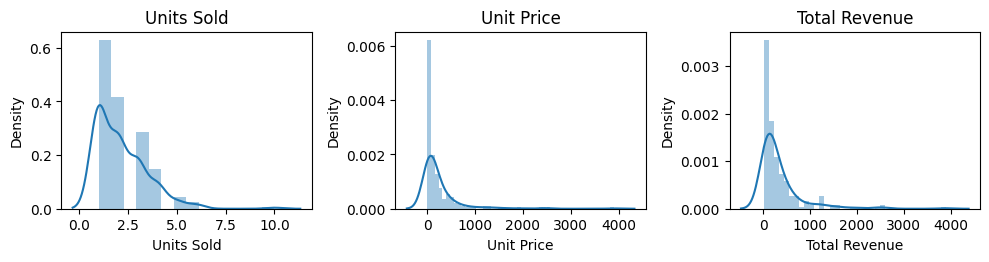

In [109]:
numeric = df_new.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize = (10,7))
for i, col in enumerate(numeric):
  plt.subplot(3,3,i+1)
  sns.distplot(df_new[col])
  plt.title(col)
  plt.tight_layout()
plt.show()

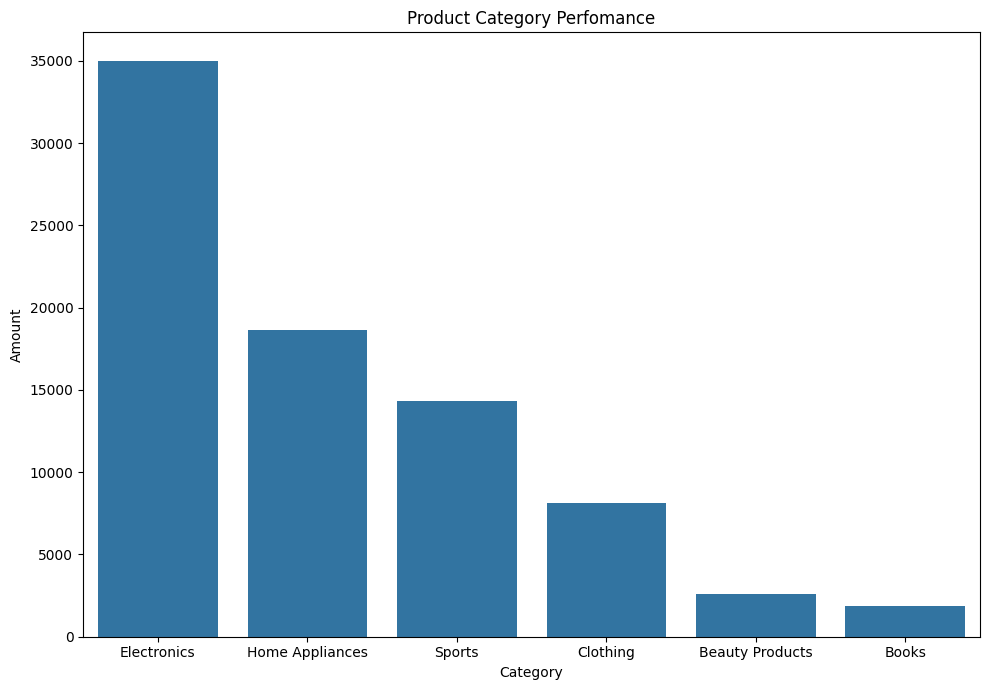

In [110]:
totalrevenuepercategory = df_new.groupby('Product Category')['Total Revenue'].sum().sort_values(ascending = False).reset_index()
plt.figure(figsize = (10, 7))
sns.barplot(data = totalrevenuepercategory, x = 'Product Category', y = 'Total Revenue', order = totalrevenuepercategory.sort_values('Total Revenue', ascending = False)['Product Category'])
plt.title('Product Category Perfomance')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

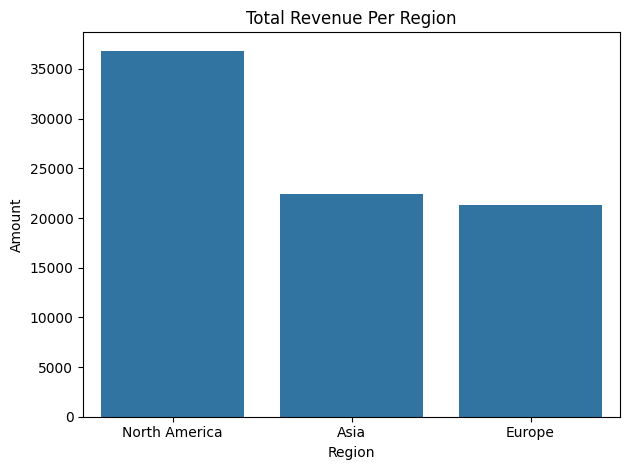

In [102]:
revenueperregion = df_new.groupby('Region')['Total Revenue'].sum().sort_values(ascending = False).reset_index()
sns.barplot(data = revenueperregion, x = 'Region', y = 'Total Revenue', order = revenueperregion.sort_values('Total Revenue', ascending = False)['Region'])
plt.title('Region Perfomance')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

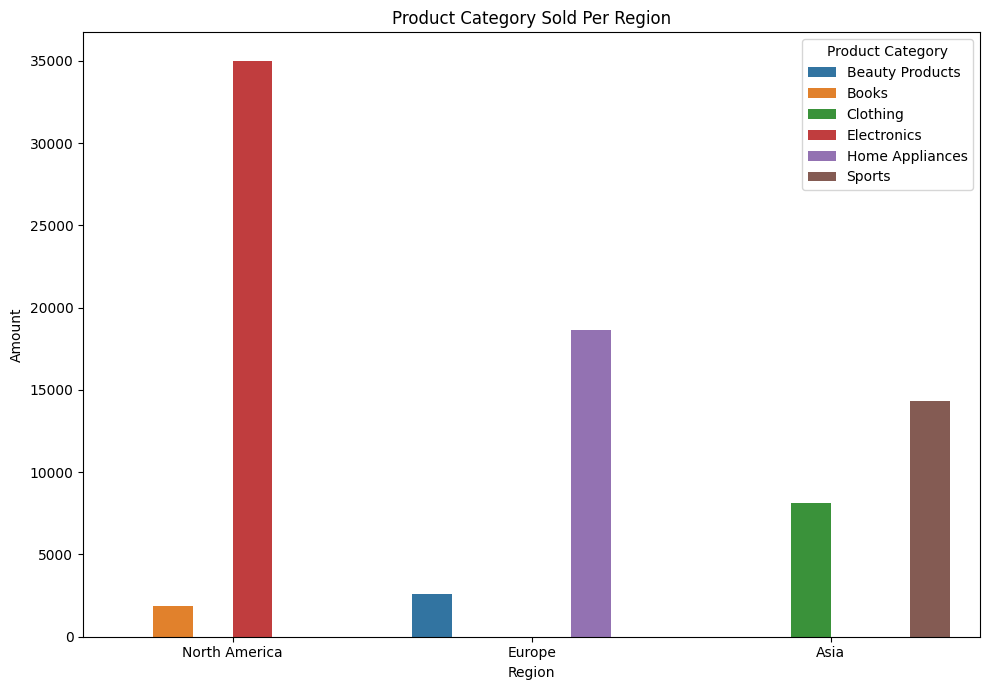

In [103]:
categoryregion = df_new.groupby(['Region', 'Product Category'])['Total Revenue'].sum().reset_index()
plt.figure(figsize = (10, 7))
sns.barplot(data = categoryregion, x = 'Region', y = 'Total Revenue', hue = 'Product Category', order = categoryregion.sort_values('Total Revenue', ascending = False)['Region'])
plt.title('Product Category Sold Per Region')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

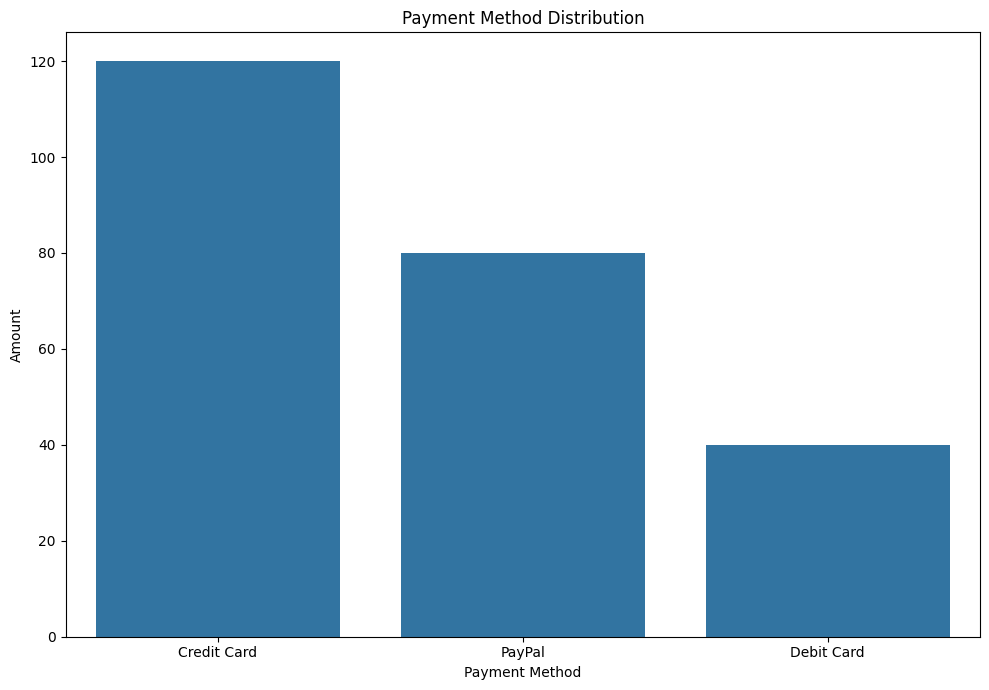

In [114]:
paymentcount = df_new.groupby('Payment Method')['Total Revenue'].count().reset_index()
plt.figure(figsize = (10, 7))
sns.barplot(data = paymentcount, x = 'Payment Method', y = 'Total Revenue', order = paymentcount.sort_values('Total Revenue', ascending = False)['Payment Method'])
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

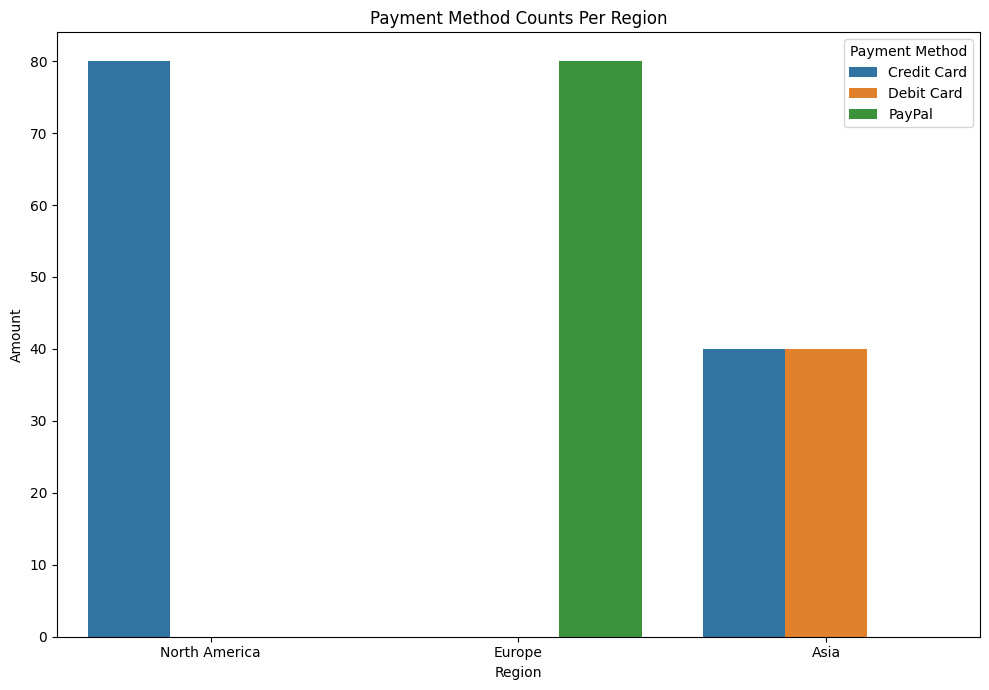

In [105]:
regionpaymentcount = df_new.groupby(['Region', 'Payment Method'])['Total Revenue'].count().reset_index()
plt.figure(figsize = (10, 7))
sns.barplot(data = regionpaymentcount, x = 'Region', y = 'Total Revenue', hue = 'Payment Method', order = regionpaymentcount.sort_values('Total Revenue', ascending = False)['Region'])
plt.title('Payment Method Counts Per Region')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

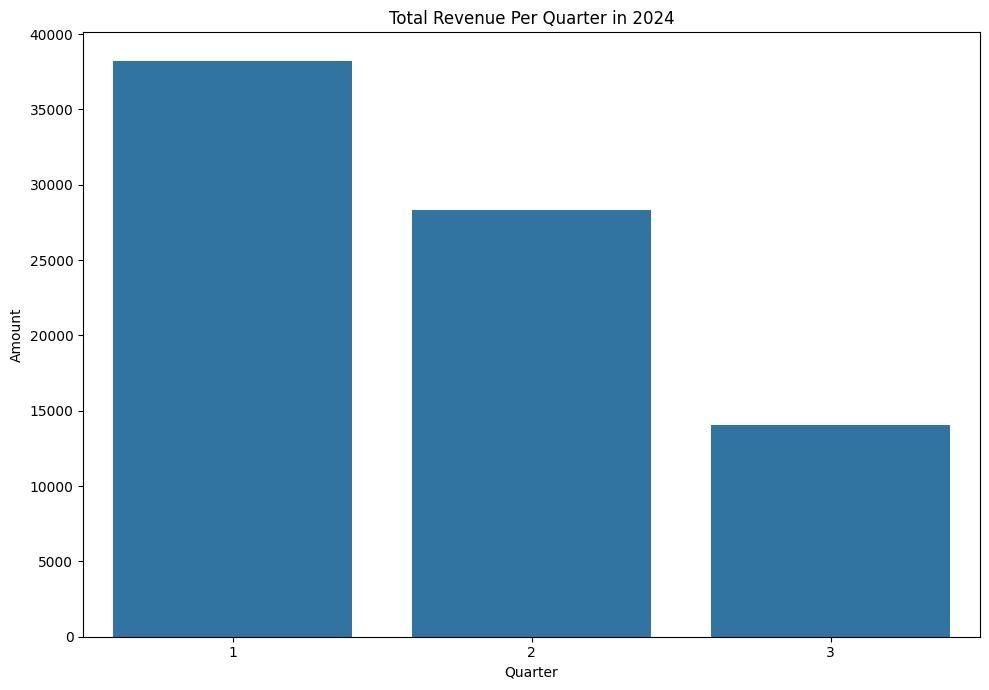

In [106]:
plt.figure(figsize = (10, 7))
totalrevenuequarterly = df_new.groupby('Quarter')['Total Revenue'].sum().reset_index()
sns.barplot(data = totalrevenuequarterly, x = 'Quarter', y = 'Total Revenue')
plt.title('Total Revenue Per Quarter in 2024')
plt.xlabel('Quarter')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

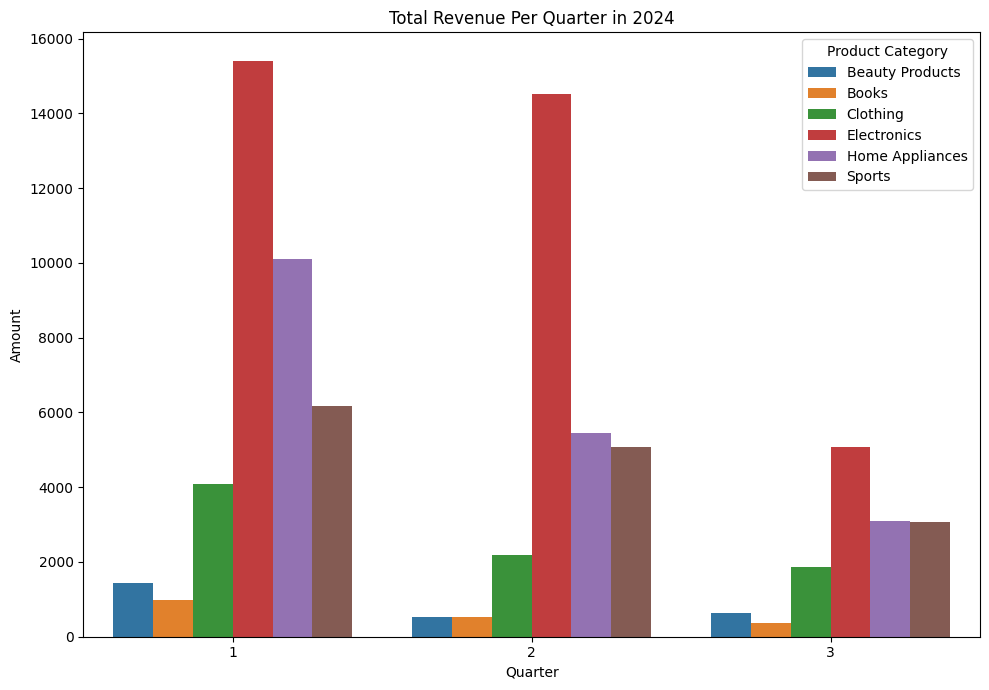

In [107]:
categoryrevenuequarterly = df_new.groupby(['Quarter', 'Product Category'])['Total Revenue'].sum().reset_index()
plt.figure(figsize = (10, 7))
sns.barplot(data = categoryrevenuequarterly, x = 'Quarter', y = 'Total Revenue', hue = 'Product Category')
plt.title('Total Revenue Per Quarter in 2024')
plt.xlabel('Quarter')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

## **Insight**

Product Performance:
Electronics lead as the top-performing category, followed by Home Appliances and Sports in second and third place, respectively. While Clothing contributes a substantial amount, Beauty Products and Books are the lowest contributors to revenue.

Regional Performance:
North America stands out as the top-performing region, with Asia and Europe demonstrating comparable performance levels.

Regional Product Category Performance:
North America shows strong performance in Electronics, with Books being a low contributor.
Europe performs well with Home Appliances, while Beauty Products are a low contributor.
Asia excels in Sports and Clothing categories.

Payment Method Distribution:
Credit cards are the most frequently used payment method, followed by PayPal, with debit cards being the least utilized.

Detailed Payment Method Distribution by Region:
In North America, credit cards are predominantly used (80 transactions).
In Europe, PayPal is the preferred method (80 transactions).
In Asia, both PayPal and Debit Card are used equally (40 transactions each).

Total Revenue Per Quarter:
There is strong revenue performance in Quarter 1, which then substantially declines through Quarter 2 and Quarter 3, with a potential rebound in the last quarter of the year.

Detailed Revenue by Category Per Quarter:
Electronics, Home Appliances, and Sports consistently emerge as the top-performing categories across the quarters.

## **Implication**

Data Enhancement for Deeper Analysis:
The current dataset, comprising 240 rows and 8 data points, is limited for complex analysis. For more effective strategic planning and to pinpoint specific product selling opportunities, it is crucial to acquire more granular data, such as product sub-category segmentation.

Targeted Regional and Product Prioritization:
Given North America's strong performance in Electronics and Europe's in Home Appliances, these areas and categories should be prioritized for continued investment and growth. For Asia, where Sports and Clothing perform well, the focus should be on expanding customer acquisition efforts within these categories. This approach allows for a balanced customer acquisition strategy across all regions while leveraging existing strengths.

Addressing Regional Economic Disparities and Payment Preferences:
Recognizing that North America and Europe may exhibit higher purchasing power compared to Asia, consider implementing tailored promotional strategies. These could include offering benefits for credit card users or introducing "buy now, pay later" options, which might particularly appeal to consumers in Asia or for high-value purchases.

Proactive Stock Management Based on Revenue Trends:
The observed quarterly revenue trends, showing high buying power early in the year (Q1/Q2) followed by a significant drop in Q2 and Q3, require proactive stock management. Businesses should use this pattern to prepare for the next year, optimizing inventory levels to meet demand during peak times and reduce holding costs during slower periods.

Sustained Focus on High-Performing Categories:
  The consistent strong performance of Electronics, Home Appliances, and Sports across all quarters indicates that these categories should remain a top priority. Continuous investment in product development, marketing, and ensuring ample stock for these categories is essential to maximize overall revenue.